**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [17]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [18]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [19]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [20]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [21]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [22]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [23]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

In [24]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
from IPython.display import display
from scipy.stats import norm

import pandas as pd 
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from exam_asg import LaborAdjustmentCosts

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

_______________________________________________________________________________________________________________________________

### Solution to question 1

Firstly, we calculate the analytical solution for $\kappa_{t} = 1.0$ and $\kappa_{t} = 2.0$ given the expression for $\ell_t$:

**For $\kappa_{t} = 1.0$**

$\ell_{t}=\left(\frac{(1-\eta)*\kappa_{t}}{w}\right)^{\frac{1}{\eta}}=\left(\frac{(1-0.5)*1}{1.0}\right)^{\frac{1}{0.5}}=0.25$

**For $\kappa_{t} = 2.0$:**

$\ell_{t}=\left(\frac{(1-\eta)*\kappa_{t}}{w}\right)^{\frac{1}{\eta}}=\left(\frac{(1-0.5)*2}{1.0}\right)^{\frac{1}{0.5}}=1$

Next, we calculate the optimal numerical solution for $\ell_t$ given $\kappa_{t} = 1.0$ and $\kappa_{t} = 2.0$, our baseline parameters and the profit function. That is, we calculate the optimal $\ell_t$ that maximizes profits for $\kappa_{t} = 1.0$ and $\kappa_{t} = 2.0$, respectively.

We do this by calling on the function `find_optimal_lt` in the `LaborAdjustmentCosts`-class in `exam.py`.

This function loops over the values of $\kappa_t$ and calculates the value of $\ell_{t}$ that maximizes profits.

In [25]:
model = LaborAdjustmentCosts() # create an instance of the model
model.find_optimal_lt() #call the function that calculates optimal labor supply

For kappa = 1.0 the optimal labor supply is lt = 0.25 which yields profits of 0.25 

For kappa = 2.0 the optimal labor supply is lt = 1.00 which yields profits of 1.00 



We see that the numerical solution is equal to the analytical solution for both values of $\kappa_{t}$. We can therefore numerically verify that it is exactly for $\kappa_t=1$ and $\kappa_t=2$ that profits are maximized.

_______________________________________________________________________________________________________________________________

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

_______________________________________________________________________________________________________________________________

### Solution to question 2

To calculate H with $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$, we call on the function `py.calculate_H` in the `LaborAdjustmentCosts`-class in `exam.py`. Furthermore, we specify `do_print=True` to print the value of H.

We know from the Law of Large Numbers (LLN) that if we let K go to infinity, the approximation error of H will go to zero (the sample average converges to the expected value). Because of the regards to computational power and computational time, we choose to let $K=10,000$. This will make the computational time reasonable, while still giving a good approximation of the expected value.

To calculate H, we first compute the ex post value of the salon by simulating the ten years of operating profits with shocks drawn from the specified distribution in each month and discounting this value. This is our $h$. We do this 10.000 times to makes sure that we get a good approximation of the expected value of the shocks. So, for each $k$ we calculate the ex post value of the salon, $h$, after all the shocks have been realized. We then sum over the values of $h$ and divide by $K$ to get the ex ante expected value of the salon, $H$.

In [26]:
H = model.calc_H(do_print=True) # call the function that calculates H and prints the results
H = model.calc_H(K=1000,do_print=True)
H = model.calc_H(K=2000,do_print=True)

The ex ante expected value function H is calculated as the mean of the h_values vector.
For K=10000 the value of H is 27.600

The ex ante expected value function H is calculated as the mean of the h_values vector.
For K=1000 the value of H is 27.649

The ex ante expected value function H is calculated as the mean of the h_values vector.
For K=2000 the value of H is 27.553



As shown above, we find that the ex ante expected value of the salon over the planning horizon of 10 years is $H=27.60$.

We reckon that with $K=10,000$ the approximation error is small enough to not affect our results substantially. With $K=10,000$ we have simulated the planning horizon of 10 years 10,000 times. The final H therefore represents a good approximation of the expected value of the salon over the planning horizon.


_______________________________________________________________________________________________________________________________

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

_______________________________________________________________________________________________________________________________

### Solution to question 3

The new policy essentially means that the hairsalon will only adjust its labor force if the change between last periods labor force and the optimal labor force in the current period is greater than some threshold $\Delta$. 

- If the change in labor force is less than $\Delta$, the firm will keep the same labor force as in the previous period. 
- If the change in labor force is greater than $\Delta$, the firm will adjust its labor force to the optimal labor force in the current period.


The function `py.calc_H` has been expanded for question 2. Therefore, it is possible to specify the value of $\Delta$ as a keyword argument. 

The addition to the function works by following a new definition of $\ell_t$ corresponding to the one described above in the case where $\Delta > 0$. However, the baseline specification of the model continues to be $\Delta=0$.

In [27]:
H = model.calc_H(Delta=0, do_print=True) # calling calc_H with Delta = 0

H = model.calc_H(Delta=0.05, do_print=True) # calling calc_H with Delta = 0.05

H = model.calc_H(Delta=0.1, do_print=True) # calling calc_H with Delta = 0.1

H =model.calc_H(Delta=0.15, do_print=True) # calling calc_H with Delta = 0.15


The ex ante expected value function H is calculated as the mean of the h_values vector.
For K=10000 the value of H is 27.600

The ex ante expected value function H is calculated as the mean of the h_values vector.
For K=10000 and Delta=0.05 the value of H is 28.283

The ex ante expected value function H is calculated as the mean of the h_values vector.
For K=10000 and Delta=0.1 the value of H is 28.306

The ex ante expected value function H is calculated as the mean of the h_values vector.
For K=10000 and Delta=0.15 the value of H is 28.092



We find that **the ex ante expected value of the salon over the planning horizon of 10 years is $H=28.28$** when $\Delta=0.05$. 

We see that the new policy improves the expected value of the salon to a certain degree. If the firm keeps adjusting the labor force every period, the adjustment costs will be high and - from the results we see above for $\Delta=0$ - higher than the gain from adjusting the labor force.

When we now let $\Delta$ increase we see that $H$ increases, but if $\Delta$ gets to high, e.g. when $\Delta=0.15$, we see that $H$ starts decreasing again, because the labor employment is now too rigid compared to the size of the fixed adjustment cost.

We see from the solution above that the optimal value of $\Delta$ will be in the intervval $0.05<\Delta<0.15$ 

_______________________________________________________________________________________________________________________________

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

_______________________________________________________________________________________________________________________________

### Solution to question 4

To find the optimal $\Delta$ that maximizes $H$, we use the function `py.find_optimal_delta` in the `LaborAdjustmentCosts`-class in `exam.py`.

This function uses the `nelder-mead` optimizer to find the value of $\Delta$ that maximizes the ex ante expected value of the salon ($H$) and returns the value of $\Delta$ as well as the appertaining value of $H$.

Next, we use the function `py.plot_optimal_delta` to plot $H$ against $\Delta$. To do this, we loop over 50 evenly spaced values of $\Delta$ and calcultate $H$ for each value of $\Delta$. We then plot the values of $H$ against the values of $\Delta$ using `matplotlib`.

H is maximized for Delta = 0.075, implying H=-28.387


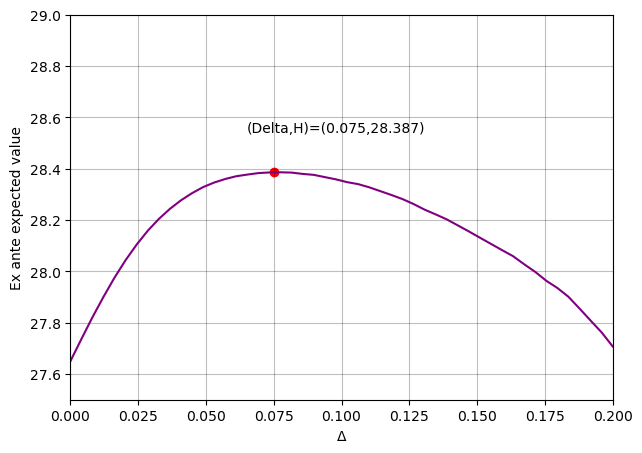

In [28]:
model.max_H(K=1000)
model.plot_Delta(K=1000)

From the results above, we can conclude that the **the ex ante expected value of the salon over the planning horizon of 10 years is maximized at $H=28.339$ when $\Delta=0.075$**.

For the $0<\Delta<0.075$ we see that the labor force is adjusted too often, so the adjustment costs actually dominate the gain from adjusting the labor force. Therefore, none of these values of $\Delta$ are the optimal solution.

Conversely, if $\Delta>0.075$ we see that the labor force is adjusted too seldom, so the gain from adjusting the labor force dominates the adjustment costs. Since the profits could be increased from adjusting the labor force more often, these solutions are not optimal either.

The best balance between adjustment costs and added value of adjusting the labor force are thus found at $\Delta=0.075$ **as highlighted in the plot above**.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



To improve profitability, we suggest that decision to adjust the labor force should be evaluated not from whether the change in staff is larger than some threshold $\Delta$, but rather from whether the change in the labor force will increase profits in the given period.

Thus, we suggest the following specification of $\ell_t$:
$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if } \quad \pi(\ell^{\ast}) > \pi(\ell_{-1})\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{ }
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \quad \text{and} \quad \pi(\ell_{t}) = \kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota \\

$$


In [29]:
H = model.calc_H(K=1000,do_print=True,extension=True)

The ex ante expected value function H is calculated as the mean of the h_values vector.
For K=1000 the value of H is 28.389



With our extension of the model, we find that we are able to increase H marginally with $0.05$ to $H=28.34$. 

This might be due to the fact that the condition for whether or not the staff should be adjusted is evaluated based on the specific profit possibilities in the given period, and not based on some exogenous threshold $\Delta$ that stays constant throughout all periods.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [30]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [31]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [32]:
# write your code here